<a href="https://colab.research.google.com/github/L4-DEV/TelecomX2/blob/main/TelecomXpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TelecomX parte 2

##Introdução

📊 TelecomX – Parte 2: Prevendo Churn
Missão reduzir a evasão de clientes por meio de soluções preditivas.

🎯 Desafio
A missão agora é clara: antecipar a evasão de clientes (churn) através do desenvolvimento de modelos preditivos eficazes. A empresa busca agir proativamente, identificando com antecedência quais clientes têm maior probabilidade de cancelarem seus serviços, permitindo ações de retenção mais direcionadas e eficientes.

🧠 Objetivos do Projeto
Realizar o pré-processamento dos dados, com foco em tratamento, codificação e normalização;

Executar análise de correlação e seleção de variáveis relevantes para o modelo;

Treinar e comparar múltiplos algoritmos de classificação;

Avaliar os modelos com base em métricas de performance (como AUC, acurácia, precisão e recall);

Interpretar os resultados, destacando a importância das variáveis no modelo;

Gerar insights estratégicos com base nas previsões e comportamento dos clientes.

##Importando a base  e classificando dados

In [652]:
import pandas as pd

url = "https://raw.githubusercontent.com/L4-DEV/TelecomX2/refs/heads/main/data/df_telecomx2.csv"
df = pd.read_csv(url)

In [653]:
df.head()

Customer_Id  Churn  Gender  Senior_Citizen  Partner  Dependents  Tenure  \
0  0002-ORFBO      0  Female               0        1           1       9   
1  0003-MKNFE      0    Male               0        0           0       9   
2  0004-TLHLJ      1    Male               0        0           0       4   
3  0011-IGKFF      1    Male               1        1           0      13   
4  0013-EXCHZ      1  Female               1        1           0       3   

   Phone_Service  Multiple_Lines Internet_Service  ...  Tech_Support  \
0              1               0              DSL  ...             1   
1              1               1              DSL  ...             0   
2              1               0      Fiber optic  ...             0   
3              1               0      Fiber optic  ...             0   
4              1               0      Fiber optic  ...             1   

   Streaming_Tv  Streaming_Movies        Contract  Paperless_Billing  \
0             1                 0        One year                  1   
1             0                 1  Month-to-month                  0   
2             0                 0  Month-to-month                  1   
3             1                 1  Month-to-month                  1   
4             1                 0  Month-to-month                  1   

     Payment_Method Charges_Monthly  Charges_Total Total_Days  Charges_Daily  
0      Mailed check           65.60         593.30        270           2.20  
1      Mailed check           59.90         542.40        270           2.01  
2  Electronic check           73.90         280.85        120           2.34  
3  Electronic check           98.00        1237.85        390           3.17  
4      Mailed check           83.90         267.40         90           2.97  

[5 rows x 23 columns]

In [654]:
for col in df:
    print(f"{col}: {df[col].unique()}")

Customer_Id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: [0 1]
Gender: ['Female' 'Male']
Senior_Citizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Phone_Service: [1 0]
Multiple_Lines: [0 1 3]
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: [0 1 3]
Online_Backup: [1 0 3]
Device_Protection: [0 1 3]
Tech_Support: [1 0 3]
Streaming_Tv: [1 0 3]
Streaming_Movies: [0 1 3]
Contract: ['One year' 'Month-to-month' 'Two year']
Paperless_Billing: [1 0]
Payment_Method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges_Monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges_Total: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Total_Days: [ 270  120  390   90 2

In [655]:
target = "Churn"


In [656]:
numerical_cols = ["Tenure","Charges_Daily"]
# Mantêm int64 ou float64


In [657]:
# 1. Mapear 3 → 0
cols_with_3 = [
    "Online_Security", "Online_Backup", "Device_Protection",
    "Tech_Support", "Streaming_Tv", "Streaming_Movies", "Multiple_Lines"
]

for col in cols_with_3:
    df[col] = df[col].replace({3: 0})

# 2. Definir colunas binárias
binary_cols = [
    "Senior_Citizen", "Partner", "Dependents", "Phone_Service",
    "Online_Security", "Online_Backup", "Device_Protection",
    "Tech_Support", "Streaming_Tv", "Streaming_Movies",
    "Paperless_Billing", "Multiple_Lines"
]

# 3. Colunas categóricas múltiplas (OneHotEncoder)
categorical_cols = ["Internet_Service", "Contract", "Payment_Method"]
for col in categorical_cols:
    df[col] = df[col].astype(str)


##Correlacionando e criando features.

###Cruzamento  correlação All x All (pré criação de feature)

✅ Resumo prático:

0 → sem relação linear.

0.3+ → já pode ser considerado relevante (moderado).

0.7+ → atenção, pois as variáveis podem estar “dizendo a mesma coisa”.

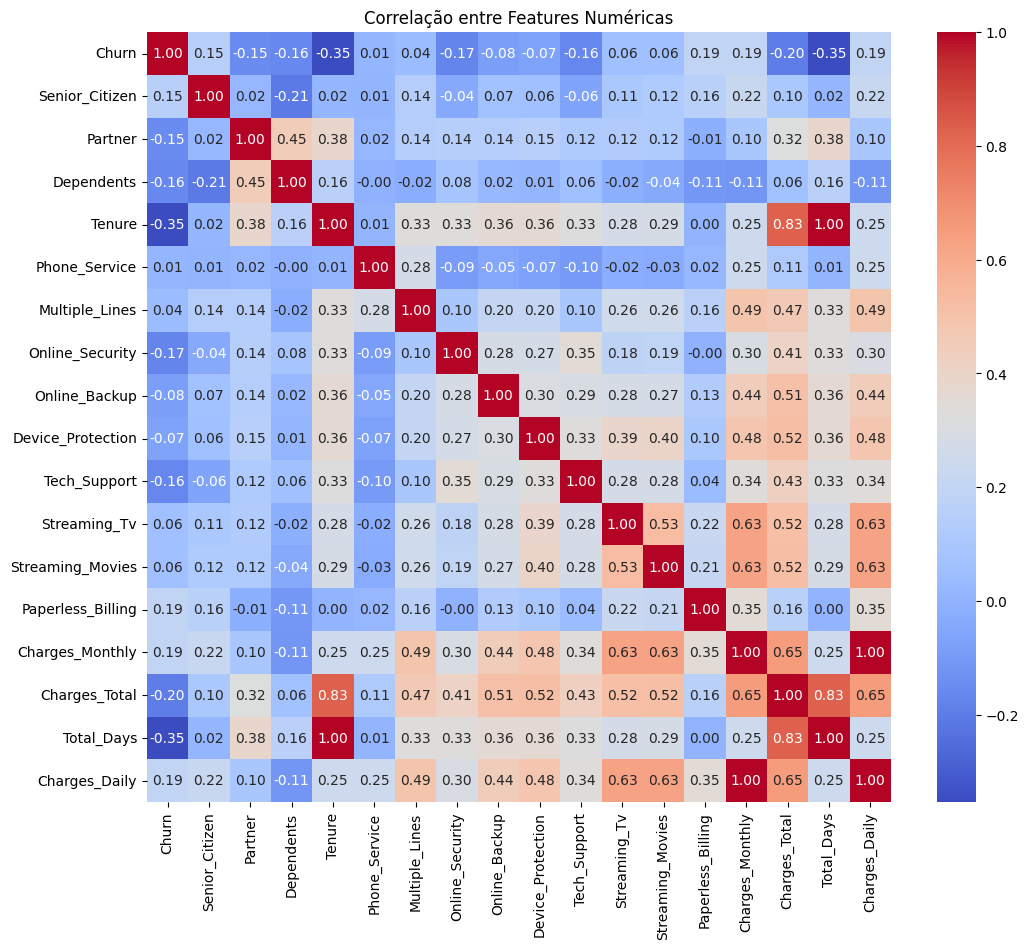

In [658]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona apenas colunas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcula a matriz de correlação
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlação entre Features Numéricas")
plt.show()


###Correlação com churn

In [659]:
# Remove Customer_Id porque não faz sentido na correlação
df_corr = df.drop(columns=['Customer_Id'])

# Converte variáveis categóricas em variáveis dummy (0/1)
df_encoded = pd.get_dummies(df_corr, drop_first=True)

# Calcula correlação de todas as variáveis com a coluna 'Churn'
correlations = df_encoded.corr()['Churn']

# Ordena por valor absoluto (maior correlação primeiro)
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print(correlations_sorted)


Churn                                     1.00
Tenure                                   -0.35
Total_Days                               -0.35
Internet_Service_Fiber optic              0.31
Contract_Two year                        -0.30
Payment_Method_Electronic check           0.30
Internet_Service_No                      -0.23
Charges_Total                            -0.20
Charges_Monthly                           0.19
Charges_Daily                             0.19
Paperless_Billing                         0.19
Contract_One year                        -0.18
Online_Security                          -0.17
Tech_Support                             -0.16
Dependents                               -0.16
Senior_Citizen                            0.15
Partner                                  -0.15
Payment_Method_Credit card (automatic)   -0.13
Payment_Method_Mailed check              -0.09
Online_Backup                            -0.08
Device_Protection                        -0.07
Streaming_Tv 

### Criação de features

In [660]:
df.columns.unique()

Index(['Customer_Id', 'Churn', 'Gender', 'Senior_Citizen', 'Partner',
       'Dependents', 'Tenure', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_Tv', 'Streaming_Movies',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Charges_Monthly',
       'Charges_Total', 'Total_Days', 'Charges_Daily'],
      dtype='object')

In [661]:
# Lista de serviços de internet
internet_services = ["Device_Protection", "Online_Backup", "Tech_Support", "Online_Security"]

# Criar a feature diretamente no df
df["Total_Internet_Services"] = df.apply(
    lambda x: x[internet_services].sum() if x["Internet_Service"] != "No" else 0, axis=1
)

# Verificar distribuição e correlação com Churn
print(df["Total_Internet_Services"].value_counts())
corr = df[["Churn", "Total_Internet_Services"]].corr().loc["Total_Internet_Services", "Churn"]
print("Correlação da nova feature com Churn:", corr)


Total_Internet_Services
0    2787
1    1467
2    1372
3     937
4     469
Name: count, dtype: int64
Correlação da nova feature com Churn: -0.1731882918591445


In [662]:
import pandas as pd

# ======= Criar coluna NonSenior =======
df['NonSenior'] = (df['Senior_Citizen'] == 0).astype(int)

# ======= Criar features Tenure × NonSenior =======
df['Tenure_Churn_NonSenior'] = df['Tenure'] * df['NonSenior']

# ======= Criar features Charges_Total × NonSenior =======
df['Charges_Total_NonSenior'] = df['Charges_Total'] * df['NonSenior']

# ======= Mostrar correlações =======
corr_tenure = df[['Tenure', 'Churn']].corr().loc['Tenure', 'Churn']
corr_tenure_ns = df[['Tenure_Churn_NonSenior', 'Churn']].corr().loc['Tenure_Churn_NonSenior', 'Churn']
corr_charges_ns = df[['Charges_Total_NonSenior', 'Churn']].corr().loc['Charges_Total_NonSenior', 'Churn']

print(f"Correlação Tenure × Churn (todos): {corr_tenure:.3f}")
print(f"Correlação Tenure_Churn_NonSenior × Churn (NonSenior): {corr_tenure_ns:.3f}")
print(f"Correlação Charges_Total_NonSenior × Churn (NonSenior): {corr_charges_ns:.3f}")


Correlação Tenure × Churn (todos): -0.354
Correlação Tenure_Churn_NonSenior × Churn (NonSenior): -0.340
Correlação Charges_Total_NonSenior × Churn (NonSenior): -0.210


In [663]:
# Criar colunas binárias Senior / NonSenior
df['Senior'] = (df['Senior_Citizen'] == 1).astype(int)
df['NonSenior'] = (df['Senior_Citizen'] == 0).astype(int)

# Feature 1: NonSenior | Electronic check
df['NonSenior_Electronic_check'] = (
    (df['NonSenior'] == 1) & (df['Payment_Method'] == 'Electronic check')
).astype(int)

# Feature 2: NonSenior | Credit card (automatic)
df['NonSenior_Credit_card_automatic'] = (
    (df['NonSenior'] == 1) & (df['Payment_Method'] == 'Credit card (automatic)')
).astype(int)

# Feature 3: Senior | Electronic check
df['Senior_Electronic_check'] = (
    (df['Senior'] == 1) & (df['Payment_Method'] == 'Electronic check')
).astype(int)

# Calcular correlação com Churn
for col in ['NonSenior_Electronic_check', 'NonSenior_Credit_card_automatic', 'Senior_Electronic_check']:
    corr_val = df[[col, 'Churn']].corr().loc[col, 'Churn']
    print(f"Correlação {col} × Churn: {corr_val:.3f}")


Correlação NonSenior_Electronic_check × Churn: 0.210
Correlação NonSenior_Credit_card_automatic × Churn: -0.146
Correlação Senior_Electronic_check × Churn: 0.184


In [664]:
# Criar as features
df['Tenure_Churn_Senior'] = df['Tenure'] * df['Senior']

# Correlação Tenure × Churn (NonSenior)
corr_tenure_nonsenior = df[['Tenure_Churn_NonSenior', 'Churn']].corr().loc['Tenure_Churn_NonSenior', 'Churn']
print(f"Correlação Tenure_Churn_NonSenior × Churn: {corr_tenure_nonsenior:.3f}")


Correlação Tenure_Churn_NonSenior × Churn: -0.340


In [665]:
# Feature 1: Senior sem Parceiro
df['Senior_NoPartner'] = ((df['Senior_Citizen'] == 1) & (df['Partner'] == 0)).astype(int)
corr = df[['Senior_NoPartner', 'Churn']].corr().loc['Senior_NoPartner', 'Churn']
print(f"Correlação Senior sem Parceiro × Churn: {corr:.3f}")

# Feature 2: NonSenior com Parceiro
df['NonSenior_WithPartner'] = ((df['Senior_Citizen'] == 0) & (df['Partner'] == 1)).astype(int)
corr = df[['NonSenior_WithPartner', 'Churn']].corr().loc['NonSenior_WithPartner', 'Churn']
print(f"Correlação NonSenior com Parceiro × Churn: {corr:.3f}")

# Feature 3: Senior sem Dependentes
df['Senior_NoDependents'] = ((df['Senior_Citizen'] == 1) & (df['Dependents'] == 0)).astype(int)
corr = df[['Senior_NoDependents', 'Churn']].corr().loc['Senior_NoDependents', 'Churn']
print(f"Correlação Senior sem Dependentes × Churn: {corr:.3f}")

# Feature 4: NonSenior com Dependentes
df['NonSenior_WithDependents'] = ((df['Senior_Citizen'] == 0) & (df['Dependents'] == 1)).astype(int)
corr = df[['NonSenior_WithDependents', 'Churn']].corr().loc['NonSenior_WithDependents', 'Churn']
print(f"Correlação NonSenior com Dependentes × Churn: {corr:.3f}")


Correlação Senior sem Parceiro × Churn: 0.150
Correlação NonSenior com Parceiro × Churn: -0.183
Correlação Senior sem Dependentes × Churn: 0.158
Correlação NonSenior com Dependentes × Churn: -0.164


In [666]:
# Feature: Senior sem Parceiro e sem Dependentes
df['Senior_NoPartner_NoDependents'] = (
    (df['Senior_Citizen'] == 1) &
    (df['Partner'] == 0) &
    (df['Dependents'] == 0)
).astype(int)

# Correlação com Churn
corr = df[['Senior_NoPartner_NoDependents', 'Churn']].corr().loc['Senior_NoPartner_NoDependents', 'Churn']
print(f"Correlação Senior sem Parceiro e sem Dependentes × Churn: {corr:.3f}")


Correlação Senior sem Parceiro e sem Dependentes × Churn: 0.151


In [667]:


# Feature 1: NonSenior com Fiber
df['NonSenior_Fiber'] = ((df['Senior_Citizen'] == 0) & (df['Internet_Service'] == 'Fiber optic')).astype(int)
corr = df[['NonSenior_Fiber', 'Churn']].corr().loc['NonSenior_Fiber', 'Churn']
print(f"Correlação NonSenior com Fiber × Churn: {corr:.3f}")



# Feature 2: NonSenior com Fiber e Phone
df['NonSenior_Fiber_Phone'] = ((df['Senior_Citizen'] == 0) &
                               (df['Internet_Service'] == 'Fiber optic') &
                               (df['Phone_Service'] == 1)).astype(int)
corr = df[['NonSenior_Fiber_Phone', 'Churn']].corr().loc['NonSenior_Fiber_Phone', 'Churn']
print(f"Correlação NonSenior com Fiber e Phone × Churn: {corr:.3f}")


Correlação NonSenior com Fiber × Churn: 0.208
Correlação NonSenior com Fiber e Phone × Churn: 0.208


In [668]:
# Tipos de contrato (removendo 'Two year' e 'One year' para Senior)
contracts = ['Month-to-month']  # Apenas contrato mensal
groups = {'Senior': 1, 'NonSenior': 0}

for contract in contracts:
    for group_name, group_val in groups.items():
        feature_name = f"{group_name}_{contract.replace('-', '_').replace(' ', '')}"
        # Criar feature no DataFrame
        df[feature_name] = ((df['Senior_Citizen'] == group_val) &
                            (df['Contract'] == contract)).astype(int)
        # Calcular correlação com Churn
        corr = df[[feature_name, 'Churn']].corr().loc[feature_name, 'Churn']
        # Imprimir correlação
        print(f"Correlação {feature_name} × Churn: {corr:.3f}")


Correlação Senior_Month_to_month × Churn: 0.229
Correlação NonSenior_Month_to_month × Churn: 0.259


###Correlação All x All adicinando features

In [669]:
df.columns.unique()

Index(['Customer_Id', 'Churn', 'Gender', 'Senior_Citizen', 'Partner',
       'Dependents', 'Tenure', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_Tv', 'Streaming_Movies',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Charges_Monthly',
       'Charges_Total', 'Total_Days', 'Charges_Daily',
       'Total_Internet_Services', 'NonSenior', 'Tenure_Churn_NonSenior',
       'Charges_Total_NonSenior', 'Senior', 'NonSenior_Electronic_check',
       'NonSenior_Credit_card_automatic', 'Senior_Electronic_check',
       'Tenure_Churn_Senior', 'Senior_NoPartner', 'NonSenior_WithPartner',
       'Senior_NoDependents', 'NonSenior_WithDependents',
       'Senior_NoPartner_NoDependents', 'NonSenior_Fiber',
       'NonSenior_Fiber_Phone', 'Senior_Month_to_month',
       'NonSenior_Month_to_month'],
      dtype='object')

In [670]:
import pandas as pd

# Selecionar apenas colunas numéricas/binárias relevantes
cols_corr = [
    'Churn',
    'Tenure',
    'Phone_Service',
    'Multiple_Lines',
    'Charges_Daily',
    'Total_Internet_Services',
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'Tenure_Churn_NonSenior',
    'Tenure_Churn_Senior',
    'Senior_NoPartner_NoDependents'
]

# Calcular matriz de correlação
corr_matrix = df[cols_corr].corr()

# Exibir a matriz
pd.set_option('display.float_format', '{:.2f}'.format)
print("Matriz de Correlação das Features:")
print(corr_matrix)


Matriz de Correlação das Features:
                                 Churn  Tenure  Phone_Service  Multiple_Lines  \
Churn                             1.00   -0.35           0.01            0.04   
Tenure                           -0.35    1.00           0.01            0.33   
Phone_Service                     0.01    0.01           1.00            0.28   
Multiple_Lines                    0.04    0.33           0.28            1.00   
Charges_Daily                     0.19    0.25           0.25            0.49   
Total_Internet_Services          -0.17    0.50          -0.11            0.22   
NonSenior_Electronic_check        0.21   -0.18           0.00            0.02   
NonSenior_Credit_card_automatic  -0.15    0.20          -0.01            0.04   
Senior_Electronic_check           0.18   -0.08           0.00            0.11   
NonSenior_WithPartner            -0.18    0.33           0.01            0.07   
NonSenior_WithDependents         -0.16    0.15          -0.00           -0

### Correlação com churn adicionando features

In [671]:
import pandas as pd

# Lista das features que você quer analisar
cols_corr = [
    'Churn',
    'Tenure',
    'Charges_Daily',
    'Total_Internet_Services',
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'Tenure_Churn_NonSenior',
    'Senior_NoPartner_NoDependents'
]

# Calcular a correlação
corr_churn = df[cols_corr].corr()['Churn'].sort_values(ascending=False)

# Exibir correlações com Churn
print(corr_churn)


Churn                              1.00
NonSenior_Month_to_month           0.26
NonSenior_Electronic_check         0.21
NonSenior_Fiber_Phone              0.21
Charges_Daily                      0.19
Senior_Electronic_check            0.18
Senior_NoPartner_NoDependents      0.15
NonSenior_Credit_card_automatic   -0.15
NonSenior_WithDependents          -0.16
Total_Internet_Services           -0.17
NonSenior_WithPartner             -0.18
Tenure_Churn_NonSenior            -0.34
Tenure                            -0.35
Name: Churn, dtype: float64


###Verificando Dispersão

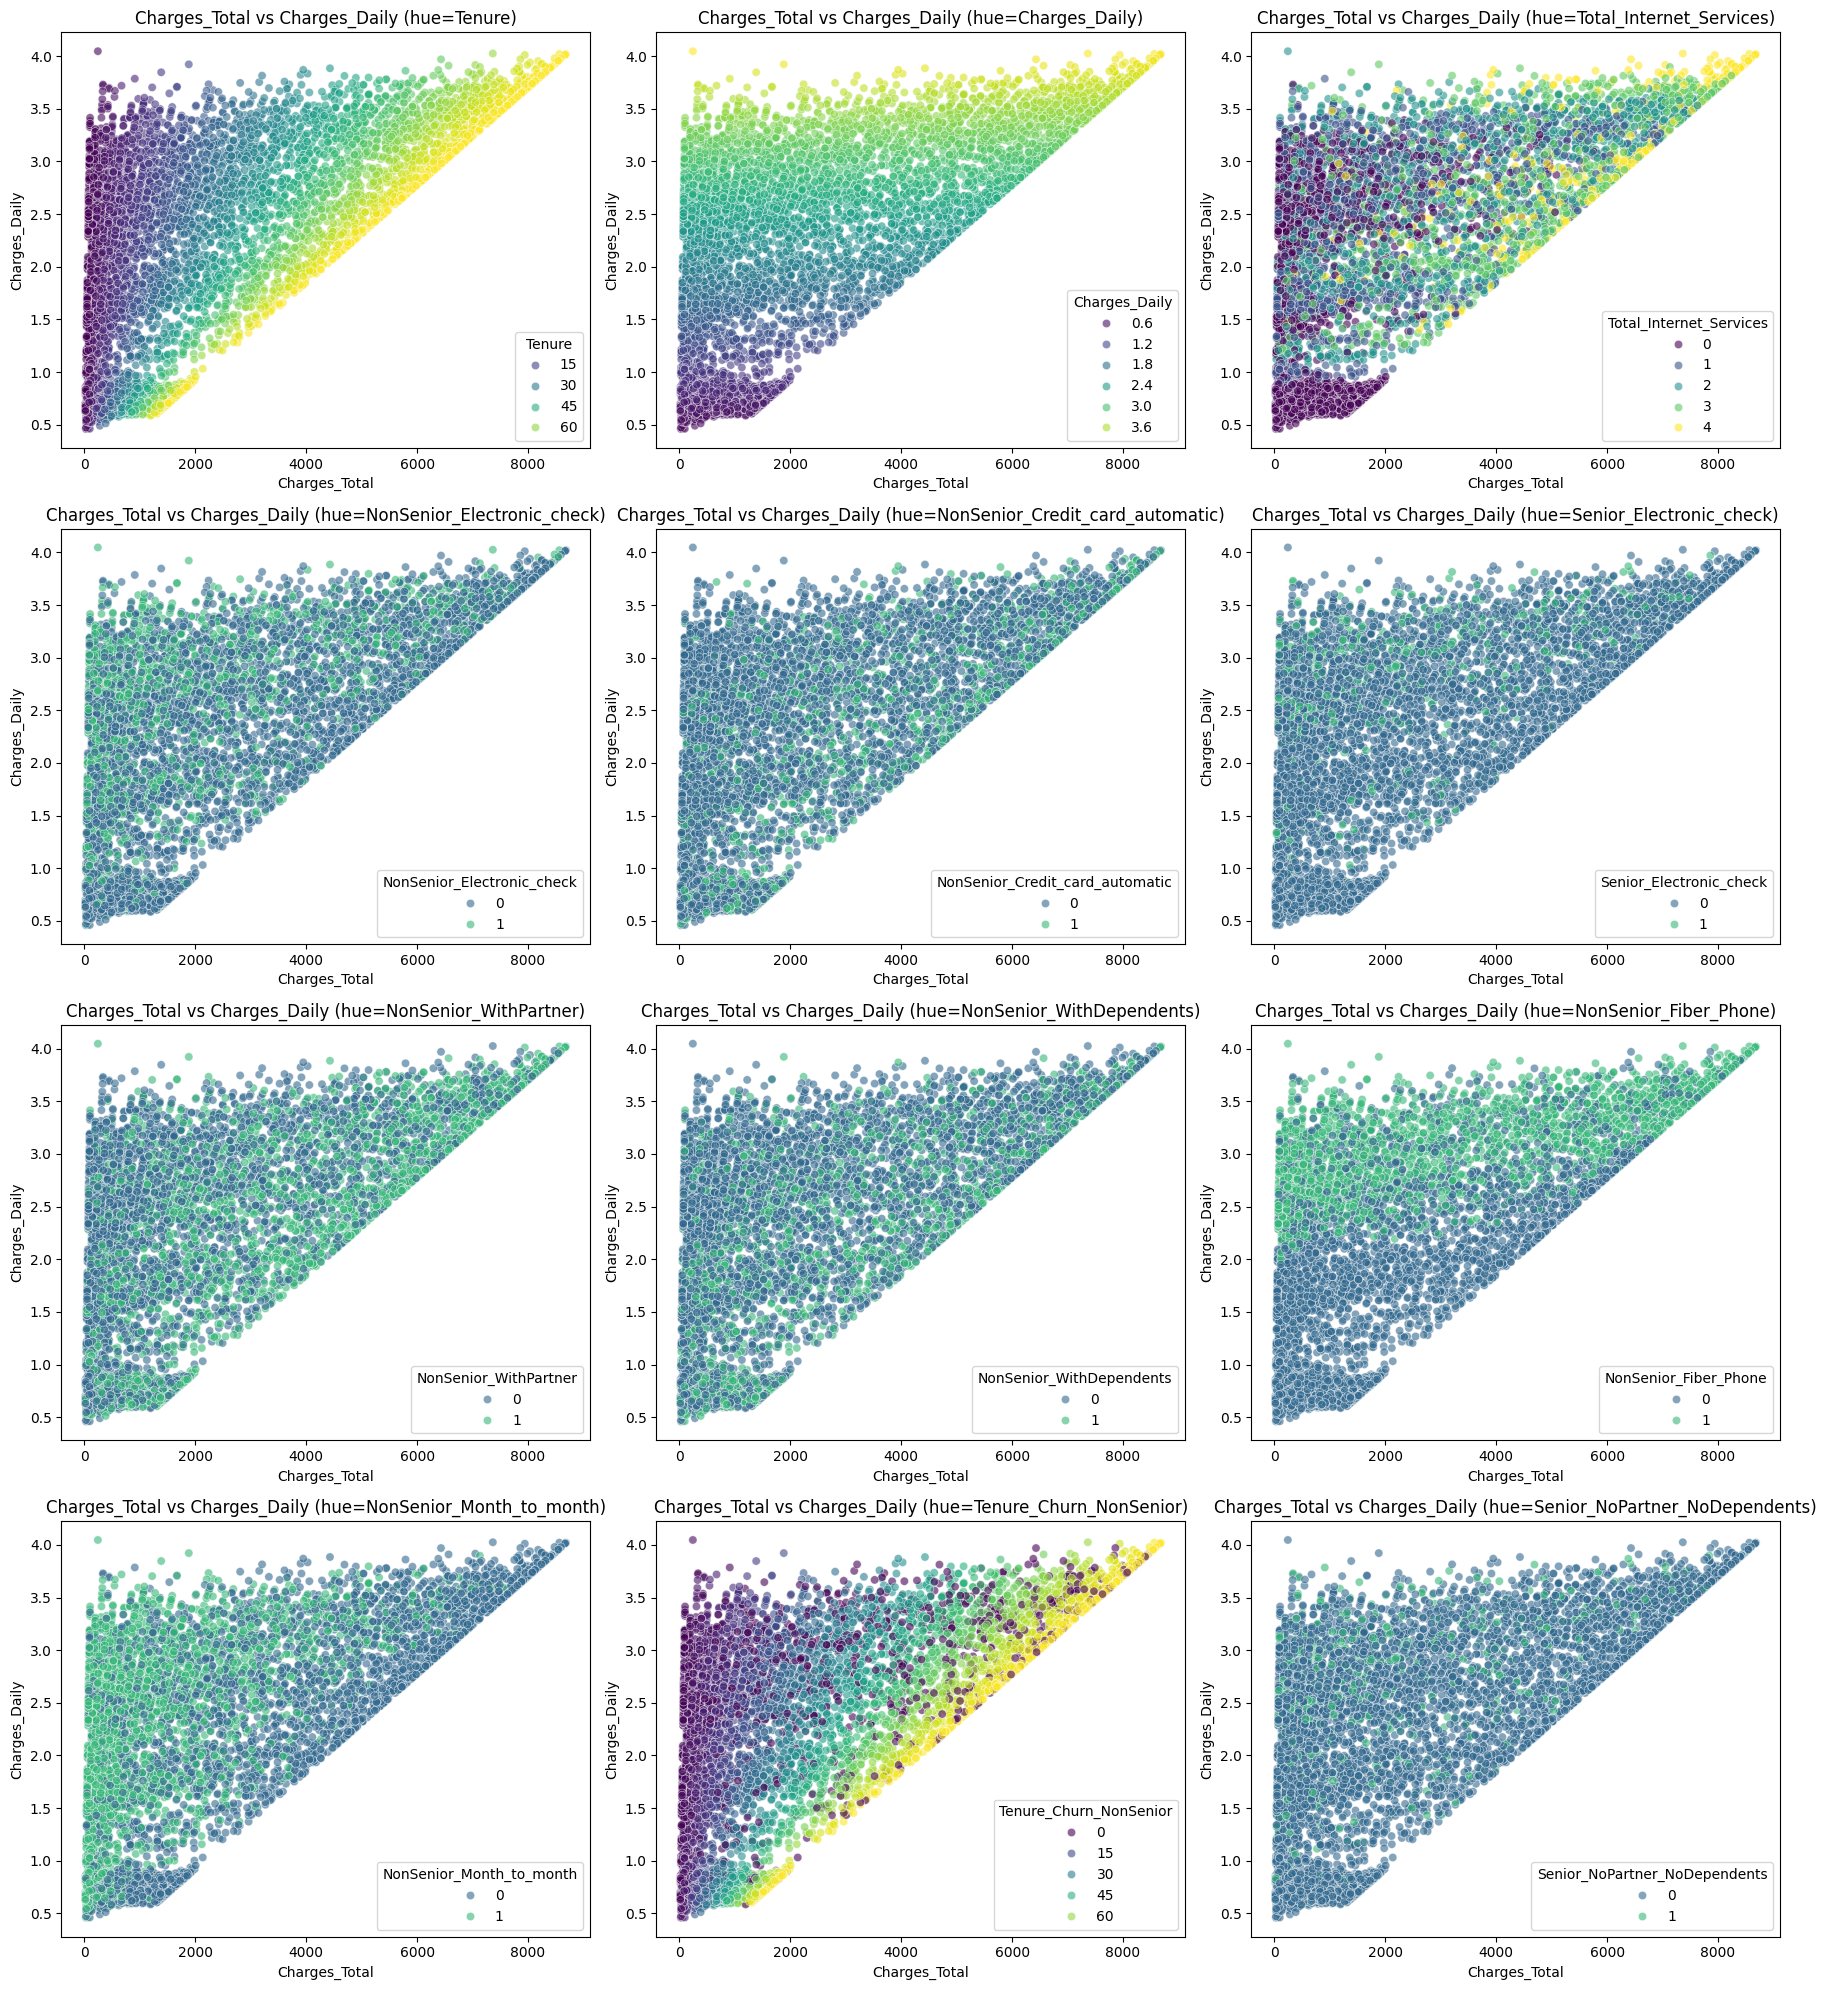

In [672]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features finais (exceto Churn que será usado como hue)
features_finais = [
    'Tenure',
    'Charges_Daily',
    'Total_Internet_Services',
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'Tenure_Churn_NonSenior',
    'Senior_NoPartner_NoDependents'
]

# Definir variáveis numéricas para eixo x e y
numeric_x = "Charges_Total"  # ou outra métrica relevante
numeric_y = "Charges_Daily"  # mantendo métrica diária para comparação

# Criar subplots: ajustar número de linhas e colunas conforme número de features
n_features = len(features_finais)
n_cols = 3
n_rows = (n_features // n_cols) + int(n_features % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

# Criar gráficos de dispersão
for i, col in enumerate(features_finais):
    sns.scatterplot(data=df, x=numeric_x, y=numeric_y, hue=col, alpha=0.6, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{numeric_x} vs {numeric_y} (hue={col})")

# Remover subplots extras se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##Transformação matemática (LOG)

Verificando necessidade de log.

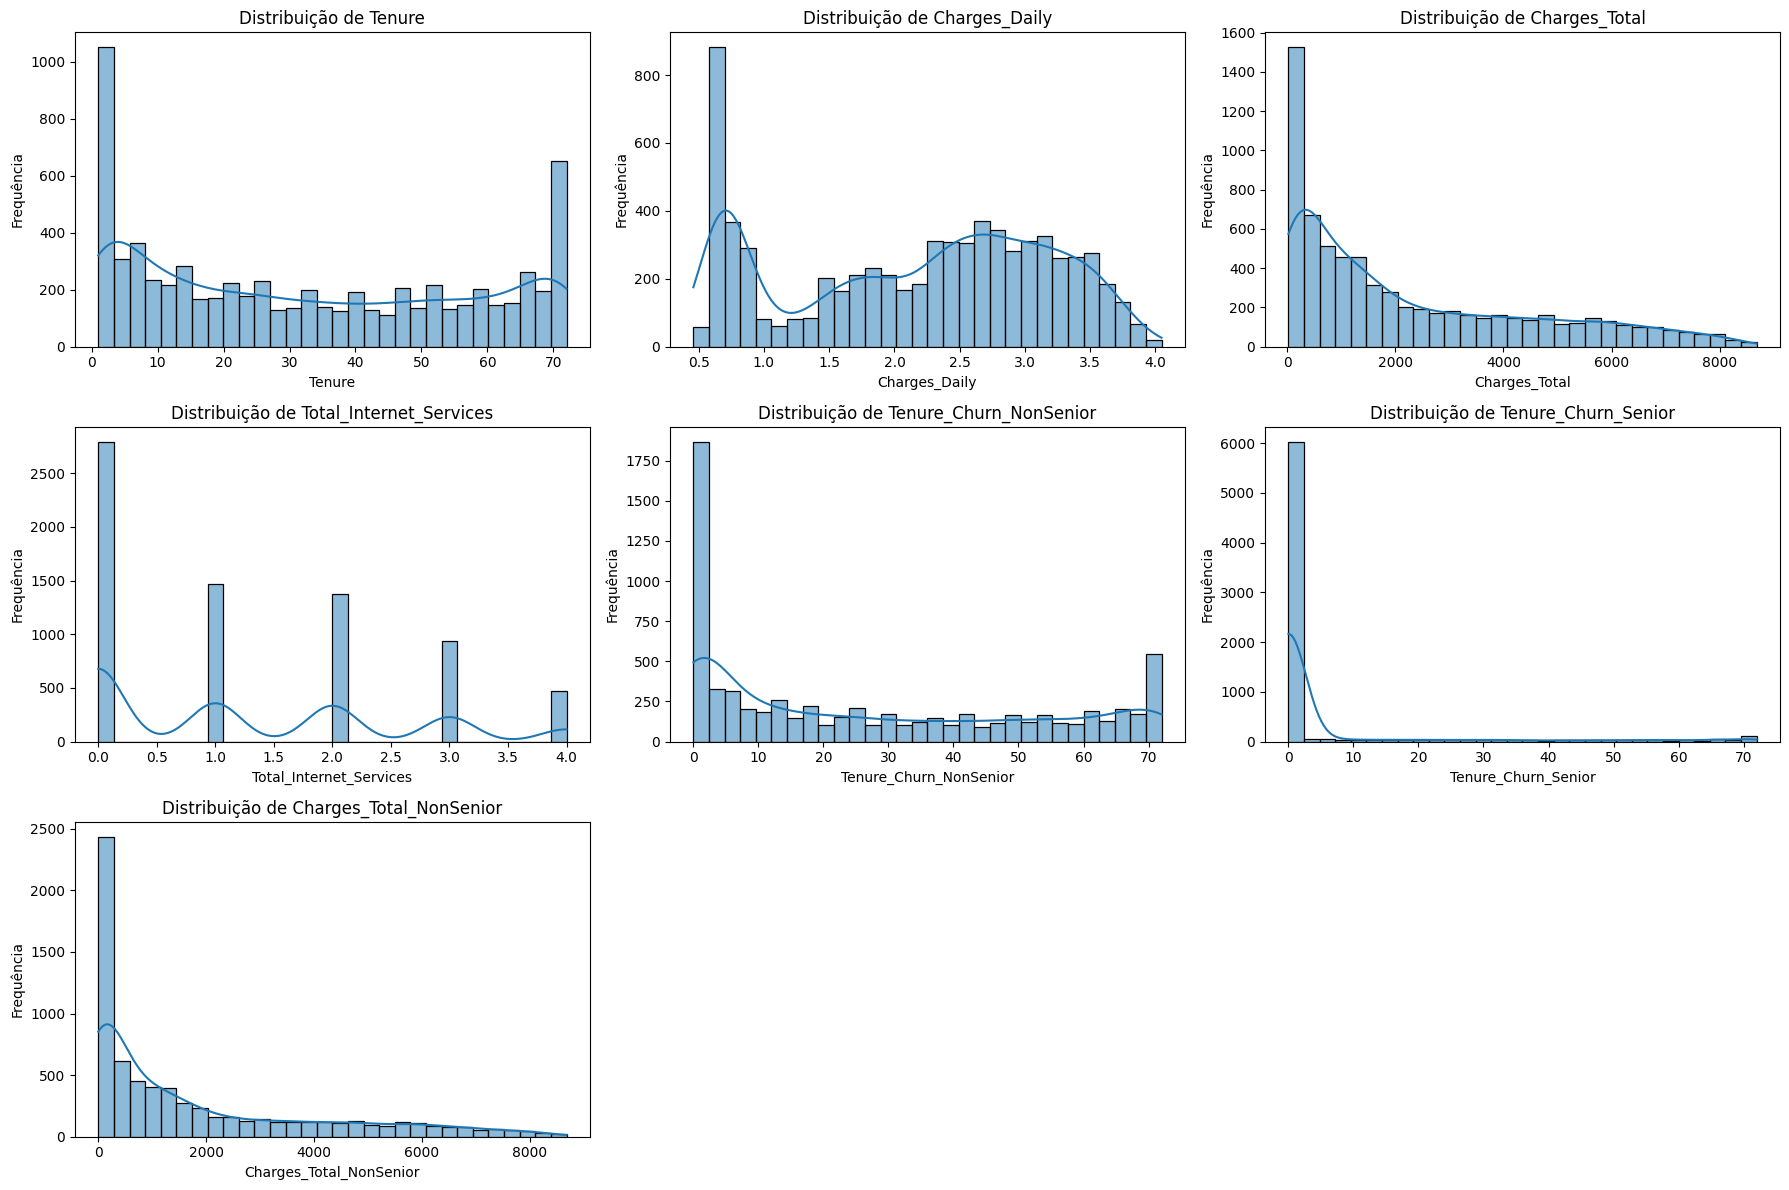

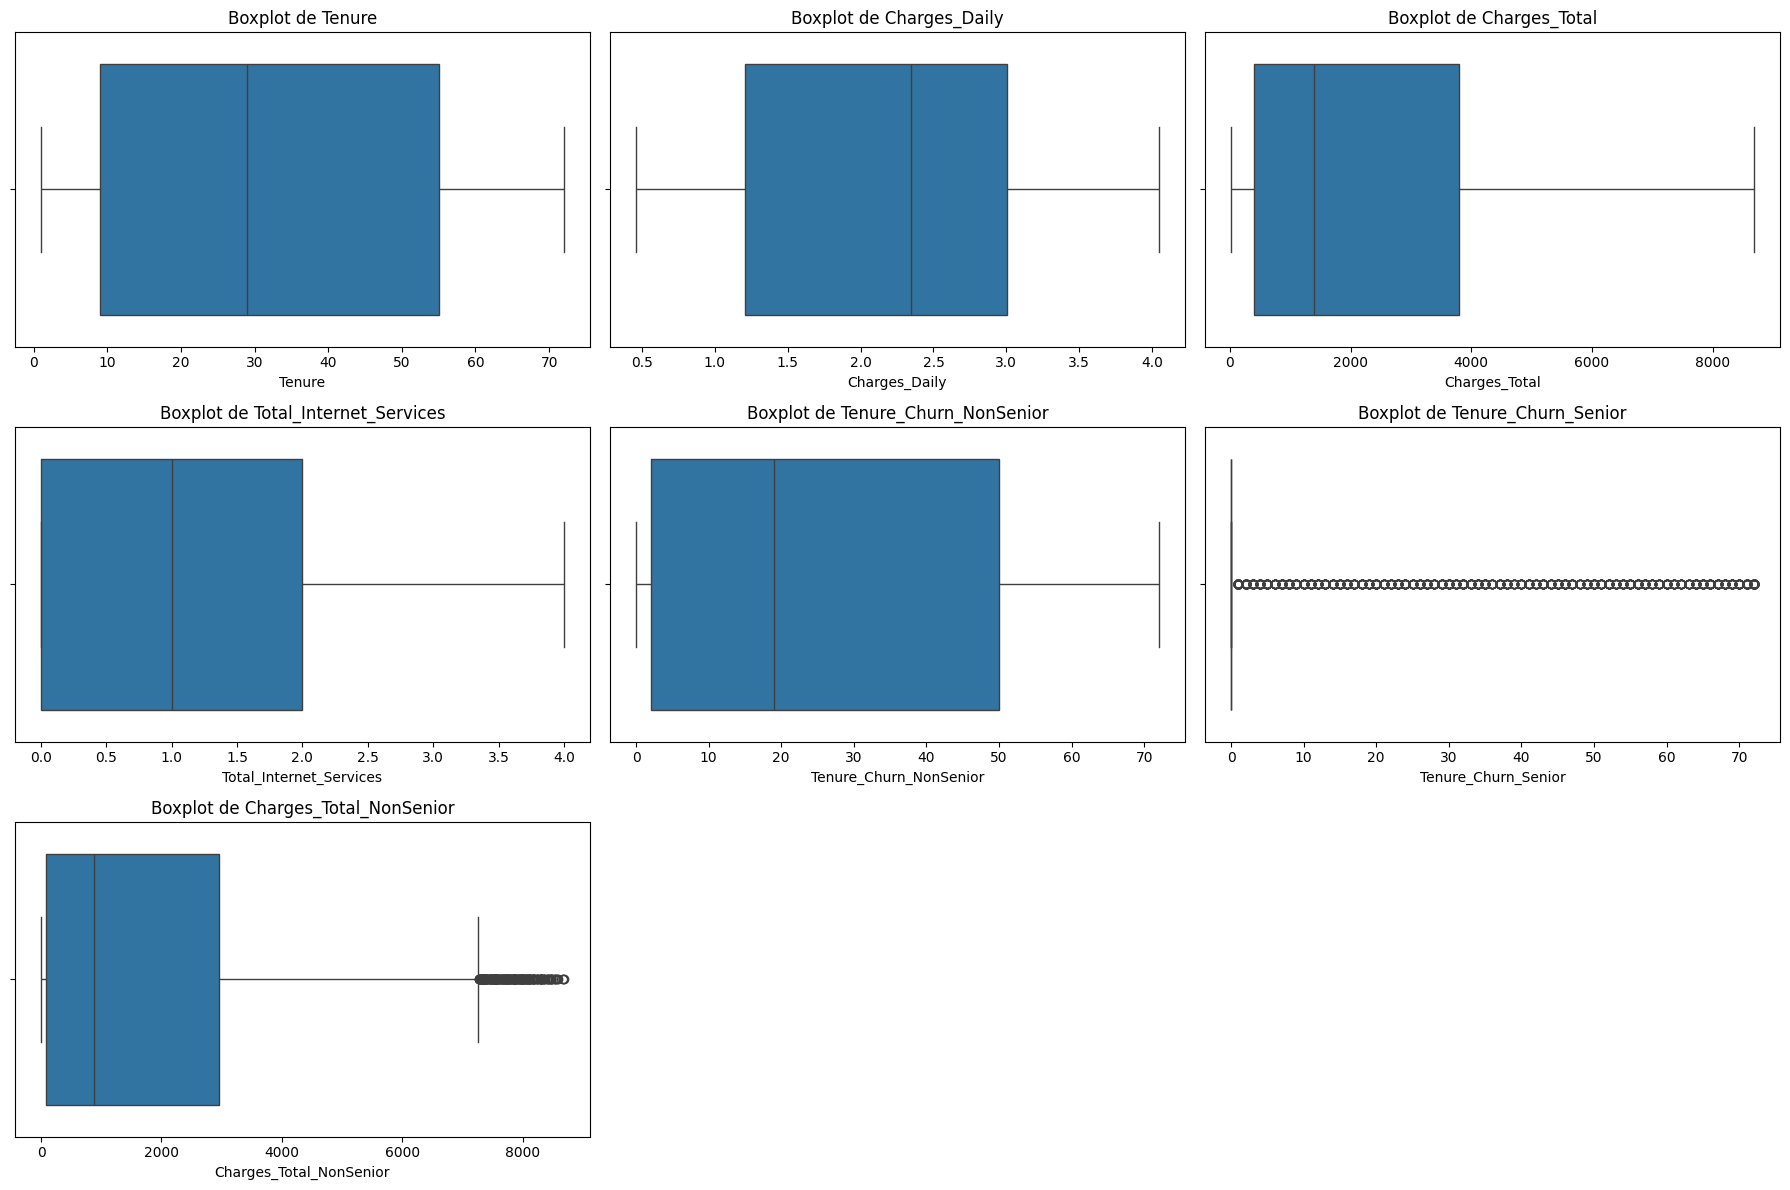

In [673]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colunas numéricas do seu conjunto de features
numerical_columns = [
    "Tenure",
    "Charges_Daily",
    "Charges_Total",          # útil para ver escala total
    "Total_Internet_Services",
    "Tenure_Churn_NonSenior",
    "Tenure_Churn_Senior",
    "Charges_Total_NonSenior"
]

# Histogramas para avaliar distribuição
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [674]:
import pandas as pd
from scipy.stats import skew

# Selecionar apenas colunas numéricas das features do modelo
numerical_columns = [
    "Tenure",
    "Charges_Daily",
    "Total_Internet_Services",
    "Tenure_Churn_NonSenior",
    "Tenure_Churn_Senior",
    "Charges_Total_NonSenior"
]

# Criar DataFrame resumo
summary = pd.DataFrame(index=numerical_columns)

summary['Mean'] = df[numerical_columns].mean()
summary['Median'] = df[numerical_columns].median()
summary['Std'] = df[numerical_columns].std()
summary['Min'] = df[numerical_columns].min()
summary['Max'] = df[numerical_columns].max()
summary['Skewness'] = [skew(df[col]) for col in numerical_columns]

# Exibir tabela em texto
print(summary)


                           Mean  Median     Std  Min     Max  Skewness
Tenure                    32.42   29.00   24.55 1.00   72.00      0.24
Charges_Daily              2.16    2.35    1.01 0.46    4.05     -0.21
Total_Internet_Services    1.27    1.00    1.29 0.00    4.00      0.63
Tenure_Churn_NonSenior    27.01   19.00   25.47 0.00   72.00      0.48
Tenure_Churn_Senior        5.41    0.00   15.68 0.00   72.00      3.05
Charges_Total_NonSenior 1826.88  881.17 2196.45 0.00 8684.80      1.25


Aplicando transformação logarítmica aos dados do dataset

In [675]:
import numpy as np

# Features a serem transformadas
features_log = [
    'Total_Internet_Services',
    'Tenure_Churn_NonSenior',
    'Tenure_Churn_Senior',
    'Charges_Total_NonSenior'
]

# Criar colunas log-transformadas
for col in features_log:
    df[f'log_{col}'] = np.log1p(df[col])

# Verificar resumo das transformações
summary_log = df[[f'log_{col}' for col in features_log]].describe().T
print(summary_log)


                              count  mean  std  min  25%  50%  75%  max
log_Total_Internet_Services 7032.00  0.65 0.58 0.00 0.00 0.69 1.10 1.61
log_Tenure_Churn_NonSenior  7032.00  2.54 1.54 0.00 1.10 3.00 3.93 4.29
log_Tenure_Churn_Senior     7032.00  0.50 1.23 0.00 0.00 0.00 0.00 4.29
log_Charges_Total_NonSenior 7032.00  5.76 2.91 0.00 4.44 6.78 7.99 9.07


In [676]:
cols_modelo = [
    'Tenure',
    'Charges_Daily',
    'Total_Internet_Services',
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'Tenure_Churn_NonSenior',
    'Senior_NoPartner_NoDependents'
]


##Codificação de variáveis (Encoder)

###Transformando váriaveis explicativas

In [677]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Lista de features finais para o modelo (as explicativas)
features_modelo = [
    'Tenure',
    'Charges_Daily',
    'log_Total_Internet_Services',
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'log_Tenure_Churn_NonSenior',
    'log_Tenure_Churn_Senior',
    'log_Charges_Total_NonSenior',
    'Senior_NoPartner_NoDependents'
]

# Identificar colunas categóricas/binárias para OneHotEncoder
categorical_cols = [
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'Senior_NoPartner_NoDependents'
]

# Criar o transformador
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_cols),
    remainder='passthrough',  # mantém as colunas numéricas sem alterar
    sparse_threshold=0
)

# Aplicar transformador
X_encoded = one_hot.fit_transform(df[features_modelo])

# Verificar o resultado
print("Shape de X_encoded:", X_encoded.shape)


Shape de X_encoded: (7032, 14)


In [678]:
# Se houver colunas categóricas no transformador, obter nomes das features codificadas
feature_names = one_hot.get_feature_names_out()

# Exibir nomes das colunas
print("Features codificadas:")
print(feature_names)


Features codificadas:
['onehotencoder__NonSenior_Electronic_check_1'
 'onehotencoder__NonSenior_Credit_card_automatic_1'
 'onehotencoder__Senior_Electronic_check_1'
 'onehotencoder__NonSenior_WithPartner_1'
 'onehotencoder__NonSenior_WithDependents_1'
 'onehotencoder__NonSenior_Fiber_Phone_1'
 'onehotencoder__NonSenior_Month_to_month_1'
 'onehotencoder__Senior_NoPartner_NoDependents_1' 'remainder__Tenure'
 'remainder__Charges_Daily' 'remainder__log_Total_Internet_Services'
 'remainder__log_Tenure_Churn_NonSenior'
 'remainder__log_Tenure_Churn_Senior'
 'remainder__log_Charges_Total_NonSenior']


In [679]:
y.dtype

dtype('int64')

##Separação e pré-processamento de dados.

###Separação da base

Divisao de dados 80 (treino/vaidação) 20 (Teste).

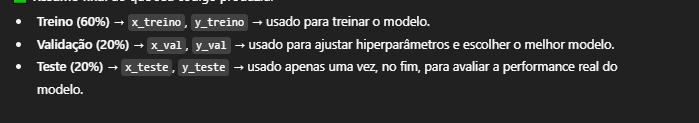

In [680]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import pandas as pd

In [681]:


# ======= Features e target =======
X = X_encoded  # seu array codificado
y = df['Churn'].values  # target

# ======= Separação treino/teste =======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ======= Verificar shapes =======
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (5625, 14)
Shape X_test: (1407, 14)
Shape y_train: (5625,)
Shape y_test: (1407,)


In [682]:
import numpy as np

classes, counts = np.unique(y, return_counts=True)
print("Classes:", classes)
print("Contagem de cada classe:", counts)

Classes: [0 1]
Contagem de cada classe: [5163 1869]


###Resampling

Verificação da Proporção de Evasão

In [683]:
import numpy as np

# Verificar distribuição das classes no treino
classes, counts = np.unique(y_train, return_counts=True)
proporcao = counts / counts.sum()

print("Contagem de classes em y_train:")
print(dict(zip(classes, counts)))

print("\nProporção de classes em y_train:")
print(dict(zip(classes, proporcao)))


Contagem de classes em y_train:
{np.int64(0): np.int64(4130), np.int64(1): np.int64(1495)}

Proporção de classes em y_train:
{np.int64(0): np.float64(0.7342222222222222), np.int64(1): np.float64(0.2657777777777778)}


Aplicando Oversample e NearMisss na base de treino .

In [684]:
# Over-sampling com SMOTE
smote = SMOTE(random_state=5)
x_treino_over, y_treino_over = smote.fit_resample(x_treino, y_treino)
print("Shape antes do SMOTE:", x_treino.shape)
print("Shape depois do SMOTE:", x_treino_over.shape)
(unique, counts) = np.unique(y_treino, return_counts=True)
print("Distribuição original:", dict(zip(unique, counts)))

(unique, counts) = np.unique(y_treino_over, return_counts=True)
print("Distribuição após SMOTE:", dict(zip(unique, counts)))


Shape antes do SMOTE: (4500, 9)
Shape depois do SMOTE: (6608, 9)
Distribuição original: {np.int64(0): np.int64(3304), np.int64(1): np.int64(1196)}
Distribuição após SMOTE: {np.int64(0): np.int64(3304), np.int64(1): np.int64(3304)}


In [685]:
# --- Undersampling com NearMiss ---
nearmiss = NearMiss(version=1)  # existem versões 1, 2 e 3
x_treino_nm, y_treino_nm = nearmiss.fit_resample(x_treino, y_treino)
print("Shape antes do NearMiss:", x_treino.shape)
print("Shape depois do NearMiss:", x_treino_nm.shape)

(unique, counts) = np.unique(y_treino, return_counts=True)
print("Distribuição original:", dict(zip(unique, counts)))

(unique, counts) = np.unique(y_treino_nm, return_counts=True)
print("Distribuição após NearMiss:", dict(zip(unique, counts)))

Shape antes do NearMiss: (4500, 9)
Shape depois do NearMiss: (2392, 9)
Distribuição original: {np.int64(0): np.int64(3304), np.int64(1): np.int64(1196)}
Distribuição após NearMiss: {np.int64(0): np.int64(1196), np.int64(1): np.int64(1196)}


###Normalização

In [686]:
from sklearn.preprocessing import MinMaxScaler

In [687]:
# --- Normalização com MinMaxScaler OVER ---
scaler = MinMaxScaler()
x_treino_over_scaled = scaler.fit_transform(x_treino_over)
x_val_scaled = scaler.transform(x_val)
x_teste_scaled = scaler.transform(x_teste)

In [688]:
pd.DataFrame(x_treino_over_scaled)

0    1    2    3    4    5    6    7    8
0    0.00 0.00 0.00 0.00 0.72 1.00 0.00 0.00 0.94
1    0.00 0.00 0.00 0.00 0.36 1.00 0.00 1.00 0.29
2    1.00 1.00 0.00 1.00 0.82 1.00 0.00 1.00 0.70
3    0.00 0.00 0.00 0.00 0.87 0.00 0.00 0.00 0.98
4    1.00 0.00 0.00 0.00 0.78 1.00 0.00 0.00 0.92
...   ...  ...  ...  ...  ...  ...  ...  ...  ...
6603 1.00 0.00 0.00 0.00 0.81 1.00 0.00 1.00 0.66
6604 1.00 0.00 0.00 0.00 0.71 0.00 0.00 1.00 0.65
6605 0.00 1.00 0.00 1.00 0.51 1.00 0.00 1.00 0.21
6606 0.00 0.00 0.00 0.00 0.26 0.00 0.00 1.00 0.62
6607 0.00 0.00 0.00 1.00 0.92 1.00 0.00 0.00 0.80

[6608 rows x 9 columns]

In [689]:
import pickle

# --- Salvar OneHotEncoder treinado com oversample ---
with open("OneHotEncoder_oversample.pkl", "wb") as f:
    pickle.dump(one_hot, f)

print("OneHotEncoder (oversample) salvo com sucesso!")

OneHotEncoder (oversample) salvo com sucesso!


In [690]:
# --- Normalização Near---
scaler_nm = MinMaxScaler()
x_treino_nm_scaled = scaler_nm.fit_transform(x_treino_nm)
x_val_scaled = scaler_nm.transform(x_val)
x_teste_scaled = scaler_nm.transform(x_teste)

In [691]:
pd.DataFrame(x_treino_nm_scaled)

0    1    2    3    4    5    6    7    8
0    0.00 0.00 0.00 0.00 0.02 0.00 0.00 0.00 0.02
1    0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.01
2    0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.01
3    0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.01
4    0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.01
...   ...  ...  ...  ...  ...  ...  ...  ...  ...
2387 0.00 0.00 0.00 0.00 0.52 1.00 0.00 0.00 0.88
2388 1.00 1.00 0.00 1.00 0.78 1.00 0.00 1.00 0.36
2389 0.00 0.00 0.00 1.00 0.88 1.00 0.00 1.00 0.95
2390 1.00 1.00 0.00 1.00 0.86 1.00 0.00 0.00 0.74
2391 0.00 0.00 0.00 0.00 0.12 1.00 0.00 0.00 0.70

[2392 rows x 9 columns]

##Criando modelo e metrificando.

🔹 1. Modelos clássicos

* Regressão Logística	Fácil de interpretar, rápido, bom para variáveis binárias e contínuas, permite ver odds e impacto de features	Não captura relações não lineares complexas
* Decision Tree (Árvore de Decisão)	Captura interações não lineares, fácil de visualizar	Pode overfit facilmente, precisa de poda ou limite de profundidade

###Modelo Decision Tree

Rodando com oversample.

In [692]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- Modelo ---
modelo_dt_oversample = DecisionTreeClassifier(max_depth=10, random_state=5)

# --- Cross-validation estratificado ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# --- Métricas ---
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# --- Cross-validation usando os dados já normalizados e oversampled ---
cv_resultados = cross_validate(modelo_dt_oversample, x_treino_over_scaled, y_treino_over, cv=skf, scoring=scoring, return_train_score=False)

# --- Resultados médios ---
print("Acurácia média:", np.mean(cv_resultados['test_accuracy']))
print("Precisão média:", np.mean(cv_resultados['test_precision']))
print("Recall médio:", np.mean(cv_resultados['test_recall']))
print("F1-score médio:", np.mean(cv_resultados['test_f1']))

# --- Treinar modelo final com o conjunto oversampled ---
modelo_dt_oversample.fit(x_treino_over_scaled, y_treino_over)

# --- Previsões na validação ---
y_val_pred = modelo_dt_oversample.predict(x_val_scaled)

# --- Matriz de confusão ---
cm = confusion_matrix(y_val, y_val_pred)
print("Matriz de confusão (validação):\n", cm)


Acurácia média: 0.765437062876998
Precisão média: 0.7610929474451196
Recall médio: 0.7751276761564204
F1-score médio: 0.7676237692095347
Matriz de confusão (validação):
 [[635 191]
 [101 198]]


In [693]:
import numpy as np

def intervalo_conf(resultados):
    """
    Calcula intervalo de confiança aproximado (±2*std) para cada métrica do cross_validate.

    resultados: dict retornado pelo cross_validate
    """
    for chave in resultados:
        if chave.startswith('test_'):
            scores = resultados[chave]
            media = scores.mean()
            desvio_padrao = scores.std()
            limite_superior = min(media + 2*desvio_padrao, 1)
            limite_inferior = max(media - 2*desvio_padrao, 0)
            print(f"{chave}: Média={media:.4f}, Intervalo de confiança ≈ [{limite_inferior:.4f}, {limite_superior:.4f}]")


intervalo_conf(cv_resultados)


test_accuracy: Média=0.7654, Intervalo de confiança ≈ [0.7512, 0.7797]
test_precision: Média=0.7611, Intervalo de confiança ≈ [0.7277, 0.7945]
test_recall: Média=0.7751, Intervalo de confiança ≈ [0.7313, 0.8190]
test_f1: Média=0.7676, Intervalo de confiança ≈ [0.7535, 0.7818]


*O modelo apresenta bom equilíbrio entre detecção de churn (recall) e evitar falsos positivos (precisão).

*O intervalo de confiança mostra que essas métricas são consistentes entre diferentes amostras do conjunto de teste

NearMiss

In [694]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Escalar dados ---
scaler = MinMaxScaler()
x_treino_nm_scaled = scaler.fit_transform(x_treino_nm)  # Treino NearMiss
x_val_scaled_nm = scaler.transform(x_val)               # Validação usando mesmo scaler

# --- Modelo ---
modelo_dt_nearmiss = DecisionTreeClassifier(max_depth=10, random_state=5)

# --- Cross-validation estratificado ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# --- Métricas ---
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# --- Cross-validation usando dados NearMiss normalizados ---
cv_resultados_nm = cross_validate(modelo_dt_nearmiss, x_treino_nm_scaled, y_treino_nm, cv=skf, scoring=scoring, return_train_score=False)

# --- Resultados médios ---
print("Acurácia média:", np.mean(cv_resultados_nm['test_accuracy']))
print("Precisão média:", np.mean(cv_resultados_nm['test_precision']))
print("Recall médio:", np.mean(cv_resultados_nm['test_recall']))
print("F1-score médio:", np.mean(cv_resultados_nm['test_f1']))

# --- Treinar modelo final com o conjunto NearMiss ---
modelo_dt_nearmiss.fit(x_treino_nm_scaled, y_treino_nm)

# --- Previsões na validação ---
y_val_pred_nm = modelo_dt_nearmiss.predict(x_val_scaled_nm)

# --- Matriz de confusão ---
cm_nm = confusion_matrix(y_val, y_val_pred_nm)
print("Matriz de confusão (validação - NearMiss):\n", cm_nm)


Acurácia média: 0.7337077768363309
Precisão média: 0.7113902039204725
Recall médio: 0.7884623430962343
F1-score médio: 0.7473924572187267
Matriz de confusão (validação - NearMiss):
 [[414 412]
 [ 72 227]]


In [695]:
import numpy as np

def intervalo_conf(resultados):
    """
    Calcula intervalo de confiança aproximado (±2*std) para cada métrica do cross_validate.

    resultados: dict retornado pelo cross_validate
    """
    for chave in resultados:
        if chave.startswith('test_'):  # pega apenas as métricas de teste
            scores = resultados[chave]
            media = scores.mean()
            desvio_padrao = scores.std()
            limite_superior = min(media + 2*desvio_padrao, 1)
            limite_inferior = max(media - 2*desvio_padrao, 0)
            print(f"{chave}: Média={media:.4f}, Intervalo de confiança ≈ [{limite_inferior:.4f}, {limite_superior:.4f}]")

# --- Exemplo de uso para NearMiss ---
# Supondo que você tenha feito:
# cv_resultados_nm = cross_validate(modelo, x_treino_nm_scaled, y_treino_nm, cv=skf, scoring=scoring, return_train_score=False)

intervalo_conf(cv_resultados_nm)


test_accuracy: Média=0.7337, Intervalo de confiança ≈ [0.6993, 0.7681]
test_precision: Média=0.7114, Intervalo de confiança ≈ [0.6713, 0.7515]
test_recall: Média=0.7885, Intervalo de confiança ≈ [0.7237, 0.8532]
test_f1: Média=0.7474, Intervalo de confiança ≈ [0.7141, 0.7807]


Decision Tree NearMiss

O modelo tem um bom recall, o que é positivo para detectar clientes propensos a churn, mas a precisão é um pouco menor, indicando que há alguns falsos positivos. No geral, o F1 mostra que o equilíbrio entre precisão e recall é razoável.

**Modelo escolhido DecisionTree com tratamento de Oversample.**

* Oversample apresenta melhor acurácia, precisão e F1-score, ou seja, o modelo consegue prever churn com mais equilíbrio sem perder desempenho geral.

* NearMiss tem um recall levemente maior, indicando que identifica um pouco melhor os churners, mas às custas da precisão e acurácia geral.

###Testando modelo escolhido em dados reais (DecisionTree).

Validação:
Acurácia: 0.7404444444444445
Precisão: 0.5089974293059126
Recall: 0.6622073578595318
F1-score: 0.5755813953488372


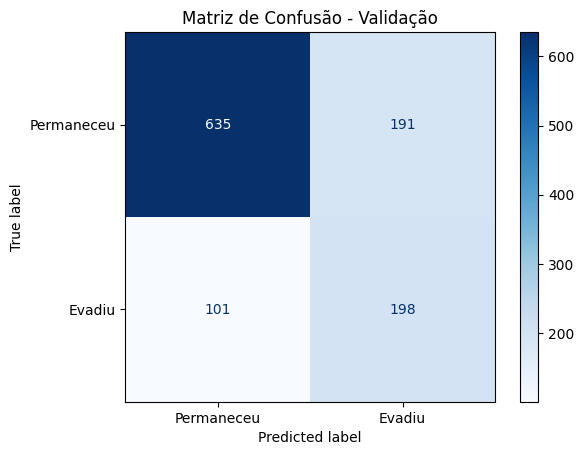

Teste:
Acurácia: 0.736318407960199
Precisão: 0.5032258064516129
Recall: 0.6256684491978609
F1-score: 0.5578069129916567


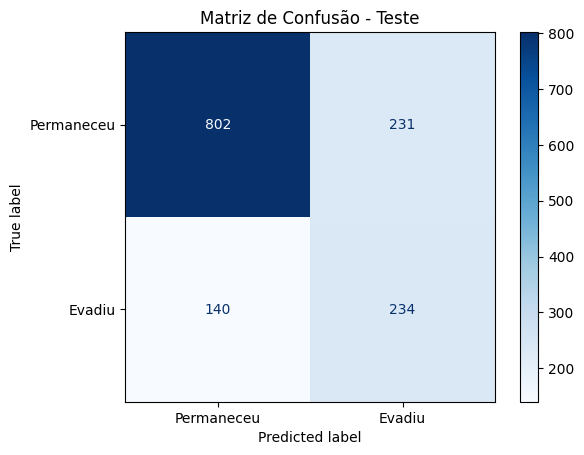

In [696]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Modelo ---
modelo_dt_oversample = DecisionTreeClassifier(max_depth=10, random_state=5)
modelo_dt_oversample.fit(x_treino_over_scaled, y_treino_over)

# --- Previsões Validação ---
y_val_pred = modelo_dt_oversample.predict(x_val_scaled)

print("Validação:")
print("Acurácia:", accuracy_score(y_val, y_val_pred))
print("Precisão:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1-score:", f1_score(y_val, y_val_pred))

# --- Matriz de Confusão Validação ---
cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['Permaneceu', 'Evadiu'])
disp_val.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Validação")
plt.show()

# --- Previsões Teste ---
y_teste_pred = modelo_dt_oversample.predict(x_teste_scaled)

print("Teste:")
print("Acurácia:", accuracy_score(y_teste, y_teste_pred))
print("Precisão:", precision_score(y_teste, y_teste_pred))
print("Recall:", recall_score(y_teste, y_teste_pred))
print("F1-score:", f1_score(y_teste, y_teste_pred))

# --- Matriz de Confusão Teste ---
cm_teste = confusion_matrix(y_teste, y_teste_pred)
disp_teste = ConfusionMatrixDisplay(confusion_matrix=cm_teste, display_labels=['Permaneceu', 'Evadiu'])
disp_teste.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste")
plt.show()


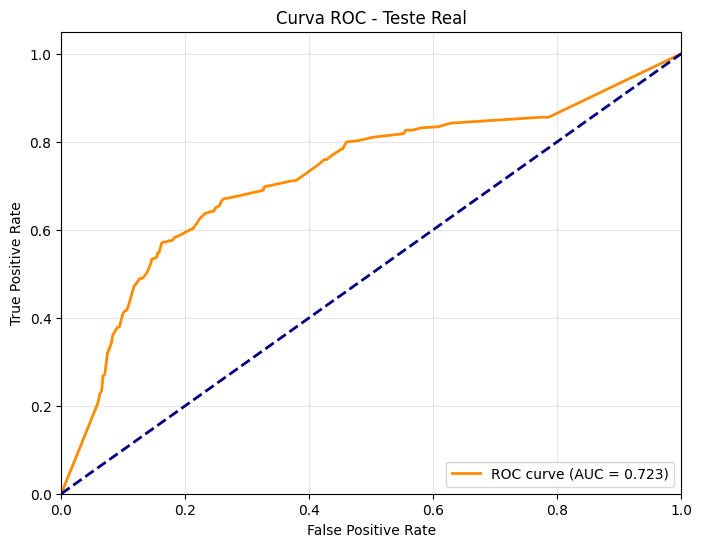

In [697]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Probabilidades da classe positiva (churn)
y_teste_prob = modelo_dt_oversample .predict_proba(x_teste_scaled)[:, 1]

# Calcular ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_teste_prob)
roc_auc = auc(fpr, tpr)

# Plotar ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Teste Real')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


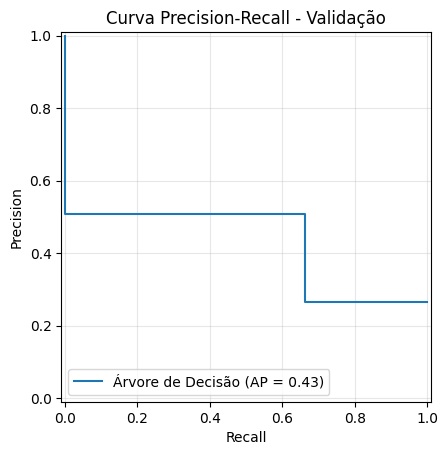

In [698]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# --- Precision-Recall para validação ---
PrecisionRecallDisplay.from_predictions(
    y_val,             # valores reais da validação
    y_val_pred,        # previsões do modelo
    name='Árvore de Decisão'
)

plt.title("Curva Precision-Recall - Validação")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(alpha=0.3)
plt.show()


O modelo obteve AUC = 0,723, indicando boa capacidade de distinguir entre clientes que churnam e os que permanecem.
O valor de AP = 0,43 mostra que o desempenho na identificação dos churners ainda é moderado.
Embora o modelo acerte em separar as classes, há espaço para ganhos em precisão nas previsões positivas.
Esses resultados refletem que a estratégia de balanceamento ajudou, mas ainda não atingiu nível ótimo.
A combinação de AUC e AP sugere um modelo útil, mas que pode ser refinado para reduzir falsos positivos.

###Modelo de Regressão Logística

Oversample

In [699]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- Modelo ---
modelo_rl_oversample = LogisticRegression(max_iter=1000, random_state=5)

# --- Cross-validation estratificado ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# --- Métricas ---
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# --- Cross-validation usando os dados já normalizados e oversampled ---
cv_resultados_log = cross_validate(
    modelo_rl_oversample, x_treino_over_scaled, y_treino_over,
    cv=skf, scoring=scoring, return_train_score=False
)

# --- Resultados médios ---
print("Acurácia média:", np.mean(cv_resultados_log['test_accuracy']))
print("Precisão média:", np.mean(cv_resultados_log['test_precision']))
print("Recall médio:", np.mean(cv_resultados_log['test_recall']))
print("F1-score médio:", np.mean(cv_resultados_log['test_f1']))

# --- Treinar modelo final com o conjunto oversampled ---
modelo_rl_oversample.fit(x_treino_over_scaled, y_treino_over)

# --- Previsões na validação ---
y_val_pred_log = modelo_rl_oversample.predict(x_val_scaled)

# --- Matriz de confusão ---
cm_val_log = confusion_matrix(y_val, y_val_pred_log)
print("Matriz de confusão (validação - Logística):\n", cm_val_log)


Acurácia média: 0.7530281808697166
Precisão média: 0.7607253474504285
Recall médio: 0.7385068537110897
F1-score médio: 0.7492257639663773
Matriz de confusão (validação - Logística):
 [[638 188]
 [ 86 213]]


In [700]:
# --- Função para calcular intervalo de confiança ---
import numpy as np

def intervalo_conf(resultados):
    """
    Calcula intervalo de confiança aproximado (±2*std) para cada métrica do cross_validate.

    resultados: dict retornado pelo cross_validate
    """
    for chave in resultados:
        if chave.startswith('test_'):  # pega apenas as métricas de teste
            scores = resultados[chave]
            media = scores.mean()
            desvio_padrao = scores.std()
            limite_superior = min(media + 2*desvio_padrao, 1)
            limite_inferior = max(media - 2*desvio_padrao, 0)
            print(f"{chave}: Média={media:.4f}, Intervalo de confiança ≈ [{limite_inferior:.4f}, {limite_superior:.4f}]")

# --- Aplicar intervalo de confiança aos resultados da Regressão Logística ---
intervalo_conf(cv_resultados_log)


test_accuracy: Média=0.7530, Intervalo de confiança ≈ [0.7374, 0.7686]
test_precision: Média=0.7607, Intervalo de confiança ≈ [0.7469, 0.7745]
test_recall: Média=0.7385, Intervalo de confiança ≈ [0.6930, 0.7840]
test_f1: Média=0.7492, Intervalo de confiança ≈ [0.7266, 0.7718]


* Com oversampling, a regressão logística apresentou acurácia média de 75,3% e F1-score de 74,9%, equilibrando bem precisão (76,1%) e recall (73,9%). Os intervalos de confiança estreitos reforçam a estabilidade do modelo. Assim, o oversample ajudou a manter equilíbrio entre classes e melhorar a generalização.

NearMiss

In [701]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- Modelo ---
modelo_rl_nearmiss = LogisticRegression(max_iter=1000, random_state=5)

# --- Cross-validation estratificado ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# --- Métricas ---
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# --- Cross-validation usando os dados NearMiss já normalizados ---
cv_resultados_log_nm = cross_validate(
   modelo_rl_nearmiss, x_treino_nm_scaled, y_treino_nm,
    cv=skf, scoring=scoring, return_train_score=False
)

# --- Resultados médios ---
print("Acurácia média:", np.mean(cv_resultados_log_nm['test_accuracy']))
print("Precisão média:", np.mean(cv_resultados_log_nm['test_precision']))
print("Recall médio:", np.mean(cv_resultados_log_nm['test_recall']))
print("F1-score médio:", np.mean(cv_resultados_log_nm['test_f1']))

# --- Treinar modelo final com o conjunto NearMiss ---
modelo_rl_nearmiss.fit(x_treino_nm_scaled, y_treino_nm)

# --- Previsões na validação ---
y_val_pred_log_nm = modelo_rl_nearmiss.predict(x_val_scaled)

# --- Matriz de confusão ---
cm_val_log_nm = confusion_matrix(y_val, y_val_pred_log_nm)
print("Matriz de confusão (validação - Logística NearMiss):\n", cm_val_log_nm)


Acurácia média: 0.7207379390466541
Precisão média: 0.7159479476896078
Recall médio: 0.7324337517433752
F1-score médio: 0.7239150656576505
Matriz de confusão (validação - Logística NearMiss):
 [[603 223]
 [ 91 208]]


In [702]:
intervalo_conf(cv_resultados_log_nm)

test_accuracy: Média=0.7207, Intervalo de confiança ≈ [0.7129, 0.7286]
test_precision: Média=0.7159, Intervalo de confiança ≈ [0.6979, 0.7340]
test_recall: Média=0.7324, Intervalo de confiança ≈ [0.7018, 0.7631]
test_f1: Média=0.7239, Intervalo de confiança ≈ [0.7140, 0.7338]


Com o uso do NearMiss, a regressão logística apresentou desempenho inferior em relação ao oversampling. A acurácia média ficou em 72,1%, com F1-score de 72,4%, revelando equilíbrio entre precisão (71,6%) e recall (73,2%). Os intervalos de confiança indicam consistência, mas mostram que o modelo perdeu capacidade preditiva em comparação ao oversample.

###Testando modelo escolhido em dados reais.

Validação:
Acurácia: 0.7564444444444445
Precisão: 0.5311720698254364
Recall: 0.7123745819397993
F1-score: 0.6085714285714285


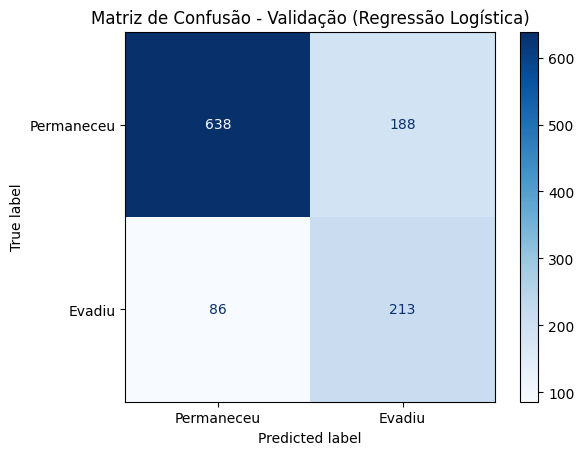

Teste:
Acurácia: 0.7640369580668088
Precisão: 0.5400763358778626
Recall: 0.7566844919786097
F1-score: 0.6302895322939867


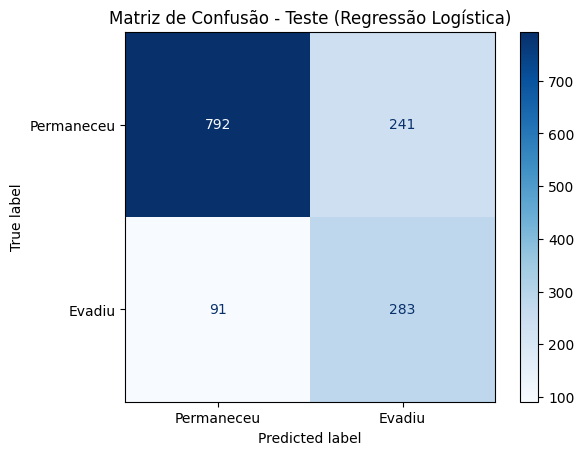

In [703]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Modelo ---
modelo_rl_oversample = LogisticRegression(max_iter=1000, random_state=5)
modelo_rl_oversample.fit(x_treino_over_scaled, y_treino_over)

# --- Previsões Validação ---
y_val_pred_log = modelo_rl_oversample.predict(x_val_scaled)

print("Validação:")
print("Acurácia:", accuracy_score(y_val, y_val_pred_log))
print("Precisão:", precision_score(y_val, y_val_pred_log))
print("Recall:", recall_score(y_val, y_val_pred_log))
print("F1-score:", f1_score(y_val, y_val_pred_log))

# --- Matriz de Confusão Validação ---
cm_val_log = confusion_matrix(y_val, y_val_pred_log)
disp_val_log = ConfusionMatrixDisplay(confusion_matrix=cm_val_log, display_labels=['Permaneceu', 'Evadiu'])
disp_val_log.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Validação (Regressão Logística)")
plt.show()

# --- Previsões Teste ---
y_teste_pred_log = modelo_rl_oversample.predict(x_teste_scaled)

print("Teste:")
print("Acurácia:", accuracy_score(y_teste, y_teste_pred_log))
print("Precisão:", precision_score(y_teste, y_teste_pred_log))
print("Recall:", recall_score(y_teste, y_teste_pred_log))
print("F1-score:", f1_score(y_teste, y_teste_pred_log))

# --- Matriz de Confusão Teste ---
cm_teste_log = confusion_matrix(y_teste, y_teste_pred_log)
disp_teste_log = ConfusionMatrixDisplay(confusion_matrix=cm_teste_log, display_labels=['Permaneceu', 'Evadiu'])
disp_teste_log.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste (Regressão Logística)")
plt.show()


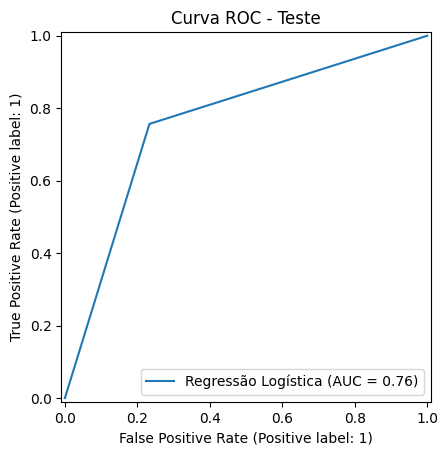

In [704]:
# --- ROC Curve Teste ---
RocCurveDisplay.from_predictions(y_teste, y_teste_pred_log, name='Regressão Logística')
plt.title("Curva ROC - Teste")
plt.show()


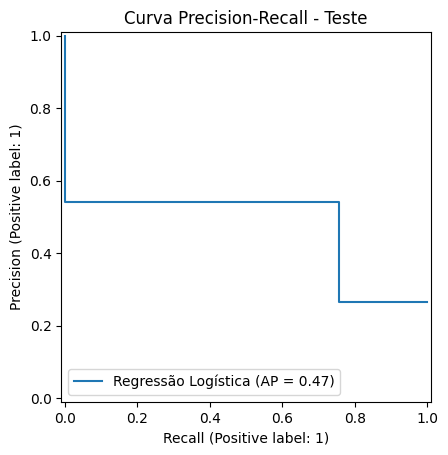

In [705]:
PrecisionRecallDisplay.from_predictions(y_teste, y_teste_pred_log, name='Regressão Logística')
plt.title("Curva Precision-Recall - Teste")
plt.show()

* O modelo de regressão logística com oversampling apresentou um bom equilíbrio entre as métricas.
A AUC de 0,76 mostra que o classificador tem boa capacidade de distinguir entre as classes.
O AP de 0,47 indica desempenho moderado na ordenação dos positivos, refletindo um ganho sobre a aleatoriedade.
Esse resultado demonstra que o oversample ajudou a melhorar a representatividade da classe minoritária.

## Análise de variáveis do modelo

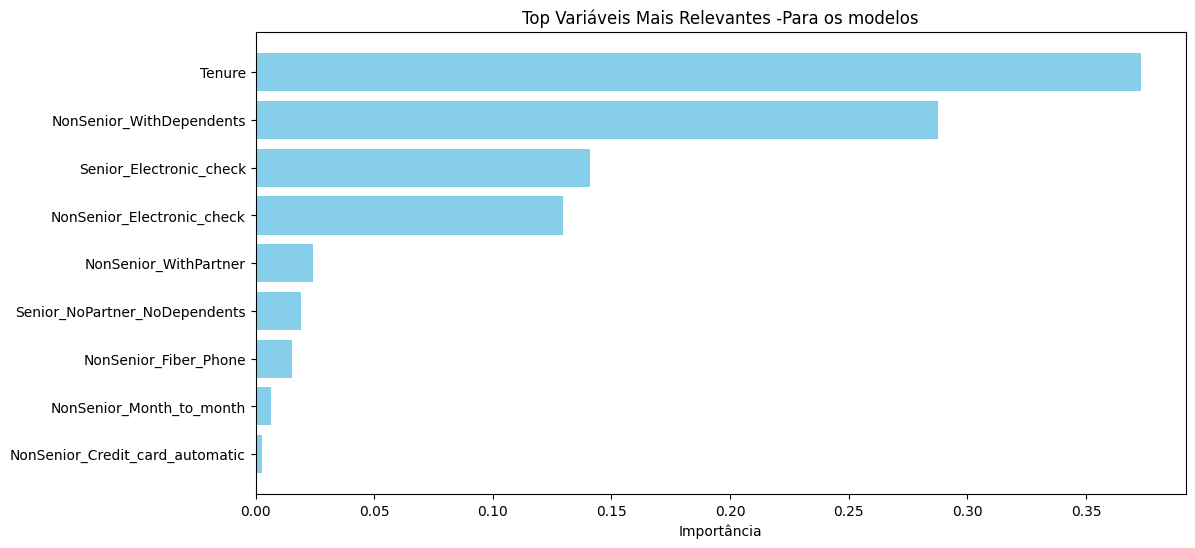

In [706]:
variaveis = [
    'NonSenior_Electronic_check',
    'NonSenior_Credit_card_automatic',
    'Senior_Electronic_check',
    'NonSenior_WithPartner',
    'NonSenior_WithDependents',
    'NonSenior_Fiber_Phone',
    'NonSenior_Month_to_month',
    'Senior_NoPartner_NoDependents',
    'Tenure'
]  # ajuste conforme as 9 colunas usadas em x_treino_over_scaled

import pandas as pd

df_importancia = pd.DataFrame({
    'Variavel': variaveis,
    'Importancia': importancias
})

# Top 10 (no caso, todas 9)
top10 = df_importancia.sort_values(by='Importancia', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(top10['Variavel'], top10['Importancia'], color='skyblue')
plt.xlabel('Importância')
plt.title('Top Variáveis Mais Relevantes -Para os modelos')
plt.gca().invert_yaxis()
plt.show()


1️⃣ Decision Tree (Oversample)

Como funciona: O modelo divide os clientes em grupos baseados nas variáveis mais informativas para separar quem churna de quem não churna. Cada divisão busca maximizar a “pureza” dos grupos.

Interpretação das suas features principais:

Tenure → clientes com menor tempo de contrato têm mais probabilidade de churn; é a feature mais decisiva.

NonSenior_Electronic_check → clientes não seniores que usam pagamento eletrônico tendem a churn mais rápido, indicando comportamento de risco financeiro ou menor fidelidade.

NonSenior_Month_to_month → contratos mensais indicam alta flexibilidade, portanto maior chance de cancelamento.

Senior_Electronic_check → clientes seniores com pagamento eletrônico têm menor churn, mas ainda relevante para identificar padrões de risco.

NonSenior_WithPartner e NonSenior_WithDependents → presença de dependentes ou parceiro influencia na retenção; clientes sem suporte familiar podem churnar mais.

NonSenior_Fiber_Phone → tipo de serviço contratado influencia: combos específicos indicam menor ou maior satisfação.

Senior_NoPartner_NoDependents → clientes seniores sem dependentes tendem a churnar menos, indicando estabilidade.

Resumo: A Decision Tree destaca quais características são mais úteis para dividir os clientes em grupos de risco, capturando interações complexas entre idade, tipo de serviço e contrato.

2️⃣ Regressão Logística (Oversample)

Como funciona: Cada coeficiente indica direção e força da relação entre a variável e a probabilidade de churn.

Interpretação das suas features principais:

Tenure → coeficiente negativo → quanto maior o tempo de contrato, menor a chance de churn.

NonSenior_Electronic_check → coeficiente positivo → clientes jovens que usam Electronic Check têm maior probabilidade de churn.

NonSenior_Month_to_month → coeficiente positivo → contratos mensais aumentam risco de churn, refletindo instabilidade contratual.

Senior_Electronic_check → coeficiente positivo ou menor que NonSenior, ajusta o risco considerando idade.

NonSenior_WithPartner / NonSenior_WithDependents → coeficientes negativos → presença de parceiro ou dependentes diminui risco, clientes mais ligados à família têm maior fidelidade.

NonSenior_Fiber_Phone → contrato de serviço específico influencia o churn, ajudando a identificar combinações de produtos que aumentam retenção.

Senior_NoPartner_NoDependents → coeficiente negativo → clientes seniores sem dependentes têm churn menor, refletindo perfil de fidelidade.

Resumo: A regressão logística permite interpretar quanto e em que direção cada característica aumenta ou diminui a probabilidade de churn, oferecendo insights claros para estratégias de retenção.

##Ações para reter o cliente

* Tenure (Tempo de contrato) – Clientes com menor tempo de contrato têm maior risco de churn. Ações: programas de boas-vindas, descontos iniciais e comunicação educativa para engajar desde o início.

* Contrato Mensal (Month-to-month) – Contratos mensais apresentam maior probabilidade de churn. Ações: incentivar a migração para contratos anuais ou pacotes flexíveis que aumentem a fidelização.

* Método de pagamento (Electronic Check) – Clientes que usam Electronic Check tendem a churn mais. Ações: promover pagamentos automáticos, alertas de vencimento e simplificação do processo de pagamento.

* Parceiro e Dependentes – Clientes com parceiro ou dependentes apresentam menor churn. Ações: oferecer pacotes familiares e benefícios que valorizem o vínculo familiar.

* Tipo de serviço (Fiber_Phone, combos) – Combos ou serviços específicos impactam a retenção. Ações: identificar combos de risco, promover upsell estratégico e customizar ofertas.

* Idade / Senioridade – Clientes seniores sem dependentes têm maior propensão a churn. Ações: criar programas de retenção diferenciados, com suporte personalizado e benefícios adaptados.

Essas ações visam reduzir a evasão, aumentando o engajamento e a satisfação dos clientes nos pontos críticos identificados pelo modelo.

##Salvando modelo

Regressão logistica.

In [711]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [712]:
with open("DecisionTree_oversample.pkl", "wb") as f:
    pickle.dump(modelo_dt_oversample, f)
print("Decision Tree (oversample) salva com sucesso!")

# --- Salvar Logistic Regression treinada com oversample ---
with open("LogisticRegression_oversample.pkl", "wb") as f:
    pickle.dump(modelo_rl_oversample, f)
print("Logistic Regression (oversample) salva com sucesso!")

Decision Tree (oversample) salva com sucesso!
Logistic Regression (oversample) salva com sucesso!


##Carregar o modelo

In [713]:
# --- Carregar OneHotEncoder (oversample) ---
with open("OneHotEncoder_oversample.pkl", "rb") as f:
    one_hot_loaded = pickle.load(f)
print("OneHotEncoder (oversample) carregado com sucesso!")

# --- Carregar Decision Tree (oversample) ---
with open("DecisionTree_oversample.pkl", "rb") as f:
    modelo_dt_oversample_loaded = pickle.load(f)
print("Decision Tree (oversample) carregada com sucesso!")

# --- Carregar Logistic Regression (oversample) ---
with open("LogisticRegression_oversample.pkl", "rb") as f:
    modelo_rl_oversample_loaded = pickle.load(f)
print("Logistic Regression (oversample) carregada com sucesso!")


OneHotEncoder (oversample) carregado com sucesso!
Decision Tree (oversample) carregada com sucesso!
Logistic Regression (oversample) carregada com sucesso!
